In [196]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [197]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [198]:
initial_data = yf.download('DOGE-USD', start='2022-03-14', end='2023-03-15')

[*********************100%***********************]  1 of 1 completed


In [199]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-14,0.111607,0.118967,0.110817,0.114048,0.114048,822092169
2022-03-15,0.114043,0.114213,0.110937,0.112784,0.112784,400614617
2022-03-16,0.112779,0.116908,0.112364,0.116908,0.116908,537170937
2022-03-17,0.116907,0.118710,0.116281,0.116502,0.116502,412838814
2022-03-18,0.116490,0.119375,0.114568,0.119306,0.119306,410862503


In [200]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-10,0.065996,0.066071,0.063023,0.065833,0.065833,475760293
2023-03-11,0.065833,0.068196,0.064447,0.066594,0.066594,449044632
2023-03-12,0.066582,0.071250,0.066069,0.071001,0.071001,375272678
2023-03-13,0.071000,0.073726,0.068514,0.073041,0.073041,537268873
2023-03-14,0.073036,0.077640,0.071777,0.074787,0.074787,652033915


In [201]:
initial_data['Adj Close'].head()

Date
2022-03-14    0.114048
2022-03-15    0.112784
2022-03-16    0.116908
2022-03-17    0.116502
2022-03-18    0.119306
Name: Adj Close, dtype: float64

In [202]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 366 entries, 2022-03-14 to 2023-03-14
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


Text(0, 0.5, 'Price (USD)')

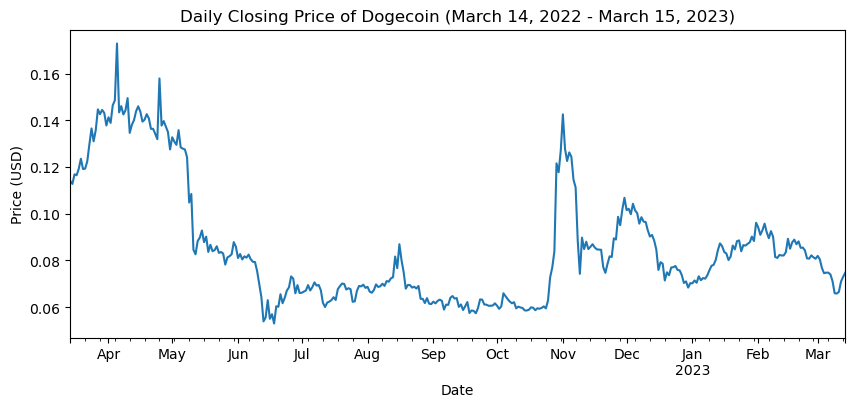

In [203]:
initial_data['Close'].plot(figsize=(10, 4))
import matplotlib.pyplot as plt
plt.title('Daily Closing Price of Dogecoin (March 14, 2022 - March 15, 2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Summary Statistics

In [204]:
data.describe().round(2)

count    366.00
mean       0.09
std        0.03
min        0.05
25%        0.07
50%        0.08
75%        0.09
max        0.17
Name: Adj Close, dtype: float64

# Changes over Time

Calculating the changes in a time series over the absolute differences, using pandas which provides a special method:

In [205]:
data.diff().head()
#Difference between today's price and yesterday's price 

Date
2022-03-14         NaN
2022-03-15   -0.001264
2022-03-16    0.004124
2022-03-17   -0.000406
2022-03-18    0.002804
Name: Adj Close, dtype: float64

In [206]:
data.diff().describe().round(2)
#Simple Returns

count    365.00
mean      -0.00
std        0.01
min       -0.03
25%       -0.00
50%       -0.00
75%        0.00
max        0.04
Name: Adj Close, dtype: float64

From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [207]:
rets = np.log(data / data.shift(1))
rets.head().round(4)
#Calculating returns

Date
2022-03-14       NaN
2022-03-15   -0.0111
2022-03-16    0.0359
2022-03-17   -0.0035
2022-03-18    0.0238
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price (USD)')

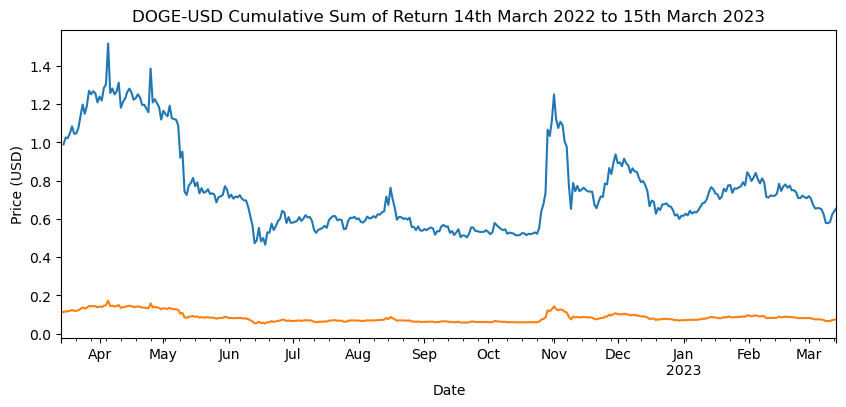

In [208]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));
initial_data['Close'].plot(figsize=(10, 4))
import matplotlib.pyplot as plt
plt.title('DOGE-USD Cumulative Sum of Return 14th March 2022 to 15th March 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
#Plotted cumulative sum of return

# Calculating the annualized volatility of a financial asset using the logarithmic returns.

In [209]:
returns = np.log(data / data.shift(1))

# Compute the standard deviation of the daily returns over the last 182 trading days
volatility = np.sqrt(365) * returns[-182:].std()

# Print the annualized volatility
print("The Annualized Volatility is:", np.round(volatility * 100,2), "%")

The Annualized Volatility is: 103.96 %


In the code np.sqrt(365) * returns[-182:].std(), this formula was implemented using Python and Numpy and the returns is a Pandas Series that contains the log returns of the asset over time, and returns[-182:].std() calculates the standard deviation of the daily log returns over the past 182 trading days. The .std() method calculates the standard deviation of these log returns. Then to annualize standard deviation, we multiply it by the square root of the number of trading days in a year and therefore we use np.sqrt(365) to multiply this standard deviation by the square root of 365 to obtain the annualized volatility.

# PART 2

# CRR Binominal Tree
The Binomial options pricing model approach has been widely used since it is able to handle a variety of conditions for which other models cannot easily be applied. This is largely because the BOPM is based on the description of an underlying instrument over a period of time rather than a single point. The Binomial options pricing model approach has been widely used since it is able to handle a variety of conditions for which other models cannot easily be applied. This is largely because the BOPM is based on the description of an underlying instrument over a period of time rather than a single point.

In [210]:
import yfinance as yf
import numpy as np
import pandas as pd

# Data Input
Valuation is performed iteratively, starting at each of the final nodes (those that may be reached at the time of expiration), and then working backwards through the tree towards the first node (valuation date). The value computed at each stage is the value of the option at that point in time.

In [211]:
S0 = 0.0741             # spot cryptocurrency price - dated 15th March 2023
K = 0.0649              # strike price of the cryptocurrency
T = 1                   # time to maturity (in years) - 1 year  
r = 0.04                # risk free rate 
sig = 0.857             # diffusion coefficient or volatility *square root of annualized volatility
N = 5                   # number of periods or number of time steps  
payoff = "put"          # payoff 

# Step 1: Create the binomial price tree
The tree of prices is produced by working forward from valuation date to expiration.

At each step, it is assumed that the underlying instrument will move up or down by a specific factor ( u or d) per step of the tree (where, by definition, u ≥ 1 and 0 < d ≤ 1 ). So, if S is the current price, then in the next period the price will either be S_up = S * u or S_down = S * d.

In [212]:
dT = float(T) / N #Delta t
u = np.exp (sig*np.sqrt(dT))#up factor
d = 1.0 / u #down factor

In [213]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [214]:
S

array([[0.0741    , 0.10870933, 0.15948337, 0.23397206, 0.34325161,
        0.50357154],
       [0.        , 0.0505091 , 0.0741    , 0.10870933, 0.15948337,
        0.23397206],
       [0.        , 0.        , 0.03442873, 0.0505091 , 0.0741    ,
        0.10870933],
       [0.        , 0.        , 0.        , 0.0234678 , 0.03442873,
        0.0505091 ],
       [0.        , 0.        , 0.        , 0.        , 0.01599646,
        0.0234678 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01090373]])

In [215]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4155667496441125

# Step 2: Find option value at each final node
At each final node of the tree-i.e. at expiration of the option-the option value is simply its intrinsic, or exercise, value: Max[(S_n-K),0] for a call option and Max[(K-S_n),0] for a put option, where K is the strike price and S_n is the spot price of the underlying asset at the n-th period.

In [216]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0143909 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0414322 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05399627]])

# Step 3: Find option value at earlier nodes
Once the above step is complete, the option value is then found for each node, starting at the penultimate time step, and working back to the first node of the tree (the valuation date) where the calculated result is the value of the option.

In [217]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.01795355, 0.00930628, 0.00280459, 0.        , 0.        ,
        0.        ],
       [0.        , 0.02434902, 0.01405727, 0.00483737, 0.        ,
        0.        ],
       [0.        , 0.        , 0.0320017 , 0.02080636, 0.00834351,
        0.        ],
       [0.        , 0.        , 0.        , 0.04040206, 0.02995414,
        0.0143909 ],
       [0.        , 0.        , 0.        , 0.        , 0.04838641,
        0.0414322 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05399627]])

In [218]:
print('European ' + payoff + ' is $', str( V[0,0].round(4)))

European put is $ 0.018


# Monte Carlo Simulation

In [219]:
import numpy as np
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [220]:
T = 1                  
r = 0.04 
sigma = 1.0196
S0 = 0.0741 
K = 0.0649

In [221]:
S = mcs_simulation_np(1000)

In [222]:
S = np.transpose(S)
S

array([[0.0741    , 0.07745161, 0.07535361, ..., 0.03802869, 0.03945953,
        0.03911387],
       [0.0741    , 0.07171367, 0.07191725, ..., 0.05564766, 0.05645294,
        0.05721566],
       [0.0741    , 0.07374237, 0.07142749, ..., 0.19675452, 0.19600014,
        0.19861875],
       ...,
       [0.0741    , 0.07384997, 0.07079046, ..., 0.02762493, 0.02885063,
        0.03077801],
       [0.0741    , 0.06966008, 0.06760272, ..., 0.05527089, 0.05540425,
        0.05928083],
       [0.0741    , 0.07388648, 0.07455271, ..., 0.0132667 , 0.01351137,
        0.01304538]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

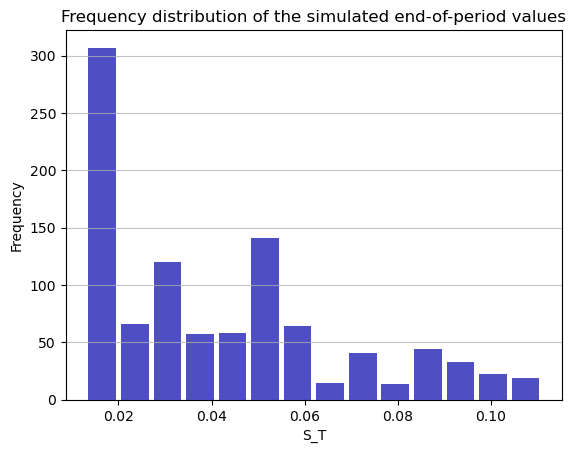

In [229]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
S=np.transpose(S)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [230]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put'+ ' $', str(p.round(4)))

European put $ 0.0209


# PART 3

## GREEKS

Black Scholes Model

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

# Option Value

In [62]:
def euro_option_DOGEUSD (S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [63]:
euro_option_DOGEUSD(0.0741, 0.0649, 1, 0.04, 0, 1.0196, 'put')

0.021070464865379286

In [101]:
S = np.linspace(0.01,1,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)): 
    Put [i] = euro_option_DOGEUSD(S[i],0.0741, 1, 0.04, 0, 1.0196,'put')

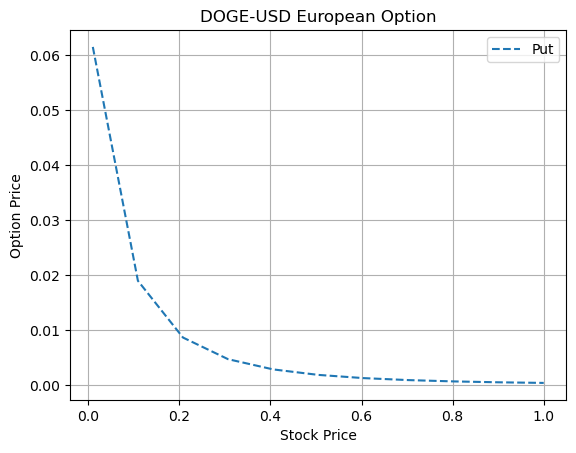

In [102]:
fig = plt.figure()
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('DOGE-USD European Option')
plt.legend(['Put'])

# Delta
Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [68]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [69]:
delta(0.0741, 0.0649, 1, 0.04, 0, 1.0196, 'put')
#update q

-0.24855290174404077

In [89]:
S = np.linspace(0.01,1,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 0.0741, 1, 0.04, 0, 1.0196,'put')

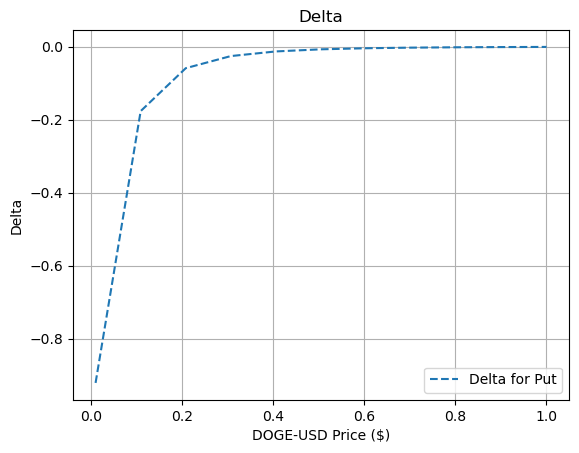

In [90]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('DOGE-USD Price ($)')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

# Gamma
Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [72]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [73]:
gamma (0.0741, 0.0649, 1, 0.04, 0, 1.0196, 'put') 

4.193081744156465

In [75]:
S = np.linspace(0.01,1,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 0.0741, 1, 0.04, 0, 1.0196, 'put') 

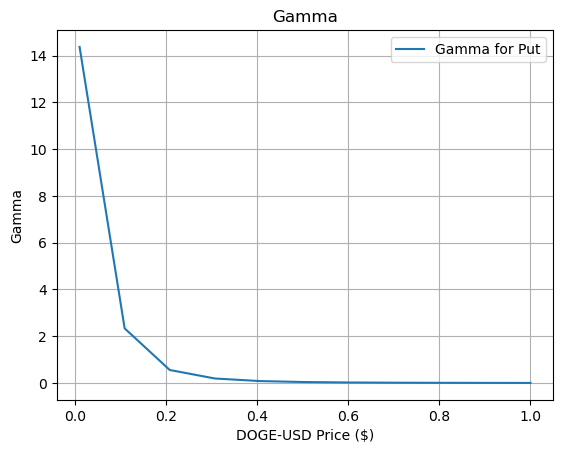

In [76]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('DOGE-USD Price ($)')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

# Speed
Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [77]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [78]:
speed (0.0741, 0.0649, 1, 0.04, 0, 1.0196, 'put')

-94.27343907631852

In [79]:
S = np.linspace(0.01,1,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 0.0741, 1, 0.04, 0, 1.0196, 'put')

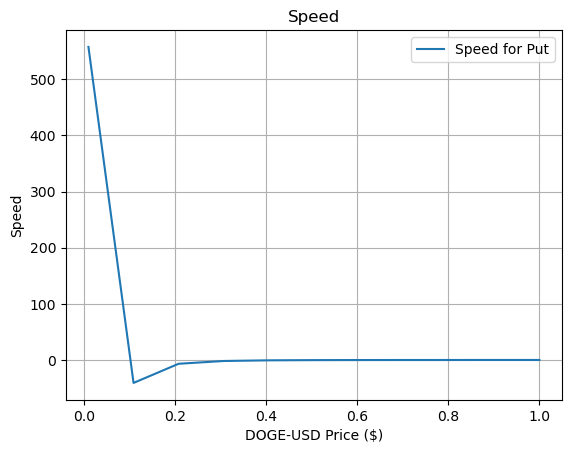

In [80]:
# fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('DOGE-USD Price ($)')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

# Theta
Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay"

In [81]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [82]:
theta(0.0741, 0.0649, 1, 0.04, 0, 1.0196, 'put')

0.01038785946538152

In [83]:
T = np.linspace(0.01,1,11)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(0.0741, 0.0649, T[i], 0.04, 0, 1.0196,'put')

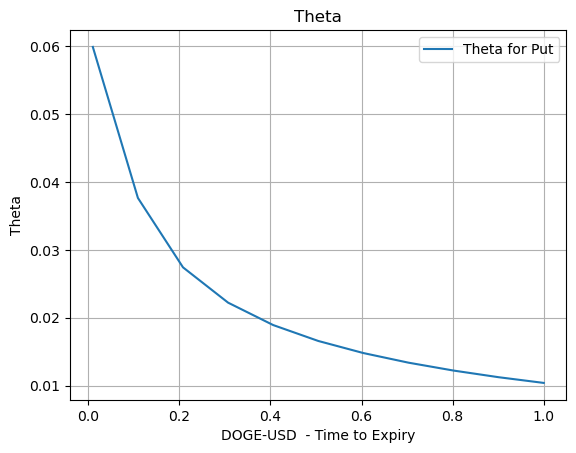

In [84]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('DOGE-USD  - Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

# Rho
Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [91]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [92]:
rho (0.0741, 0.0649, 1, 0.04, 0, 1.0196, 'put')

-0.03948823488461271

In [94]:
r = np.linspace(0,0.1,11) 
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(0.0741, 0.0649, T[i], 0.04, 0, 1.0196, 'put')

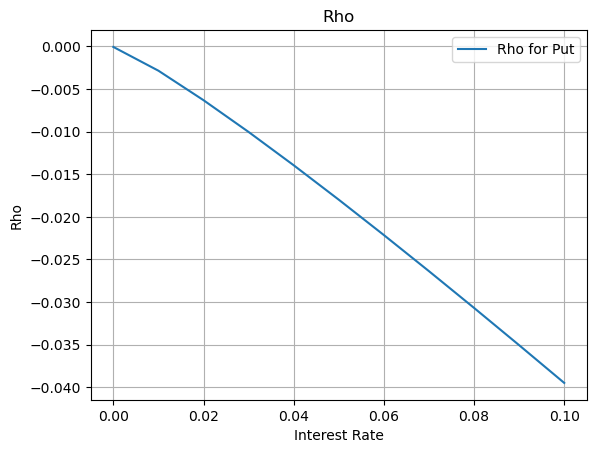

In [95]:
Put [i] = rho(0.0741, 0.0649,1, r[i], 0, 1.0196, 'put')
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

# Vega
Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [96]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [97]:
vega (0.0741, 0.0649, 1, 0.04, 0, 1.0196, 'put')

0.02347467410899574

In [99]:
vol = np.linspace(0.01,1,11)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(0.0741, 0.0649, 1, 0.04, 0, vol[i], 'put')

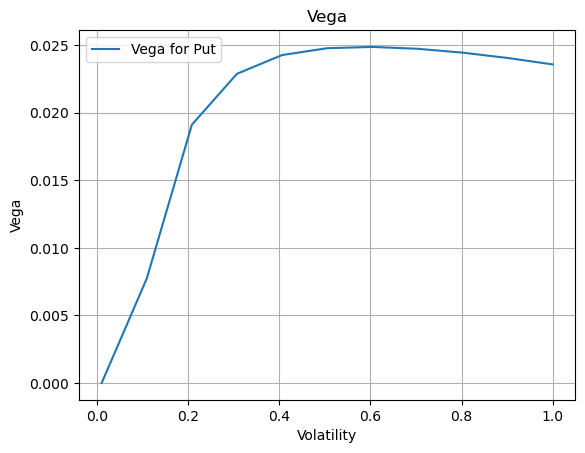

In [100]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])